<a href="https://colab.research.google.com/github/ChauQueBinh/20130204_ChauQueBinh_ML/blob/main/Lab_7_20130204_ChauQueBinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [ ]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_2023'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML_2023


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA


from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_classif

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [10]:
#code
dataset = datasets.load_iris()
x= dataset['data']
y= dataset['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf=svm.SVC(kernel='sigmoid', random_state=0)
scores= cross_validate (clf,x,y,scoring='accuracy',cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


In [11]:
cv= KFold(n_splits=10, random_state=1, shuffle=True)
model= svm.SVC(kernel='rbf', random_state=0)
scores=cross_val_score(model,x,y,scoring='accuracy',cv=cv)
print(scores.mean())

0.96


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [13]:
#code
X = SelectKBest(chi2, k=2).fit_transform(x,y)

clf=RandomForestClassifier(n_estimators=100)
scores= cross_validate(clf,X,y,scoring='accuracy',cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.9666666666666666




```
`# This is formatted as code`
```

#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [17]:
# code
# importing libraries
from sklearn.cluster import KMeans
from sklearn import datasets
# loading dataset
dataset = datasets.load_digits
# building model
# kmeans = KMeans(n_clusters = 10, random_state = 0)
# kmeans.fit(dataset.)
# clusters = kmeans.predict(datet.data)
# kmeans.cluster_centers_.shapeas

In [33]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
digits = load_digits()

# Reshape the data to a 2D array
X = digits.data.reshape((len(digits.data), -1))

# Apply K-Means with k=10
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the centroids and labels
print("Cluster Centroids:")
# print(centroids)
print("\nCluster Labels:")
print(labels)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centroids:

Cluster Labels:
[5 7 7 ... 7 3 3]


In [31]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [37]:
sse = []
for k in range(0,11):
  kmeans = KMeans(n_clusters=10, random_state = 0)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

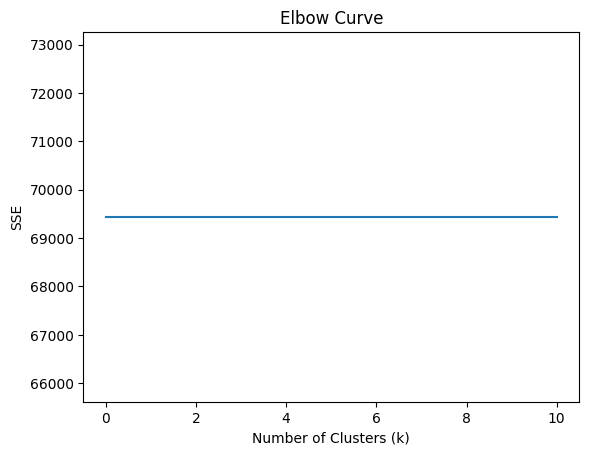

In [38]:
import matplotlib.pyplot as plt

# Generate an elbow curve to visualize the optimal k
plt.plot(range(0,11), sse)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [25]:
# code
from sklearn.metrics.cluster import completeness_score

In [26]:
dataset = datasets.load_digits()
X= dataset['data']
y= dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Random forest
clf=RandomForestClassifier(n_estimators=100)

accuracy_rf_1 = accuracy_score(clf,X,y,scoring='accuracy',cv=10)
precision_rf_1 = precision_score(clf,X,y,scoring='precision_macro',cv=10)
recall_rf_1 = recall_score(clf,X,y,scoring='recall_macro',cv=10)
f1_rf_1 = f1_score(clf,X,y,scoring='f1_macro',cv=10)

#NaiveBayes 
clf = GaussianNB()
accuracy_bayes_1 =  accuracy_score(clf,X,y,scoring='accuracy',cv=10)
precision_bayes_1 =  precision_score(clf,X,y,scoring='precision_macro',cv=10)
recall_bayes_1 = recall_score(clf,X,y,scoring='recall_macro',cv=10)
f1_bayes_1 = f1_score(clf,X,y,scoring='f1_macro',cv=10)


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [ ]:
#code

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [ ]:
#code

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code

#Finally,
Save a copy in your Github. Remember renaming the notebook.